In [1]:
import numpy as np 
from methods import *

In [2]:
# Generate transition matrices

def generate_transition_matrix_with_dummy_states(S, num_arms, num_states, num_dummy_states):
    # Initialize transition matrices
    P = np.zeros((num_arms, num_states + num_dummy_states, 2, num_states + num_dummy_states))

    for n in range(num_arms):
        # Transitions within non-dummy states (s in S)
        for s in range(num_states):
            if s == 0:
                # Boundary condition for state 0:
                P[n, s, 1, s + S] = np.random.rand()  # Stay in state 0
                P[n, s, 1, s + S + 1] = 1 - P[n, s, 1, s + S]  # Move to state 1
            elif s == num_states - 1:
                # Boundary condition for state 9 (last state):
                P[n, s, 1, s + S - 1] = np.random.rand()  # Move to state 8
                P[n, s, 1, s + S] = 1 - P[n, s, 1, s + S - 1]  # Stay in state 9
            else:
                # General case for non-boundary states
                P[n, s, 1, s + S - 1] = np.random.rand()  # Move to s-1
                P[n, s, 1, s + S + 1] = 1 - P[n, s, 1, s + S - 1]  # Move to s+1

            # Action 0: No pull, move to s+1, unless it's the last state
            if s < num_states - 1:
                P[n, s, 0, s + 1] = 1.0  # Move to s+1 with probability 1
            else:
                P[n, s, 0, s] = 1.0  # Stay in state 9 if it's the last state

        # Transitions within dummy states (s in S_a)
        for s_a in range(num_states, num_states + num_dummy_states):
            normal_state_index = s_a - num_states
            # Copy transitions from the corresponding normal state for action 0 within dummy states
            P[n, s_a, 0, num_states:num_states + num_dummy_states] = P[n, normal_state_index, 0, 0:num_states]
            P[n, s_a, 1, num_states:num_states + num_dummy_states] = P[n, normal_state_index, 0, 0:num_states]

    return P

In [3]:
def comparison(S, N, group_member_num, K, S_prime, A, T, num_simulations = 20000, type = 'General'):
    # Define the reward function, from state 0 (reward 10) to state 9 (reward 1)
    r = np.array(list(range(S, 0, -1)) + list(range(S, 0, -1)))  # Non-dummy and dummy states have the same rewards
    P = generate_transition_matrix_with_dummy_states(S, N, S, S)

    optimal_reward, fluid_reward, fluid_std = fluid_policy(N, T, S, S_prime, A, K, group_member_num, P, r, num_simulations)
    random_reward, random_std = random_policy(N, T, S, S_prime, A, K, group_member_num, P, r, num_simulations)
    no_pull_reward, no_pull_std =  no_pull_policy(N, T, S, S_prime, A, K, group_member_num, P, r, num_simulations)
    finite_whittle_reward, finite_whittle_std =  finite_whittle_policy(N, T, S, S_prime, A, K, group_member_num, P, r, num_simulations)
    infinite_whittle_reward, infinite_whittle_std = infinite_whittle_policy(N, T, S, S_prime, A, K, group_member_num, P, r, num_simulations)

    experiment_synthetic_result = {
        "Optimal": (optimal_reward, None),
        "fluid": (fluid_reward, fluid_std),
        "random": (random_reward, random_std),
        "no-pull": (no_pull_reward, no_pull_std),
        "finite whittle": (finite_whittle_reward, finite_whittle_std),
        "inifinite whittle": (infinite_whittle_reward, infinite_whittle_std)
    }
    plot_methods_with_confidence(experiment_synthetic_result, N, T, K, group_member_num, num_simulations, type)


## Test S = 10, N = 10, Group size = 3, T = 10, K = 3

/opt/anaconda3/lib/python3.12/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Solver status: optimal
Optimal value: 323.4834803671261
Average total reward over 5 simulations: 881.8, stdev is 30.646370095004727
Number of pulls in dummy states (LP-based policy): 25
Average total achieved value over 5 simulations (Random policy): 795.0, stdev is 95.51701419119004
Average total achieved value over 5 simulations (No-Pull policy): 853.0, stdev is 84.28226385189235
Whittle Indices (including dummy states):
Average total achieved value over 5 simulations (General Finite Whittle index policy): 897.8, stdev is 43.939731451159325
Whittle Indices (including dummy states):
Average total achieved value over 5 simulations (General Infinite Whittle index policy): 880.2, stdev is 83.23580960139692


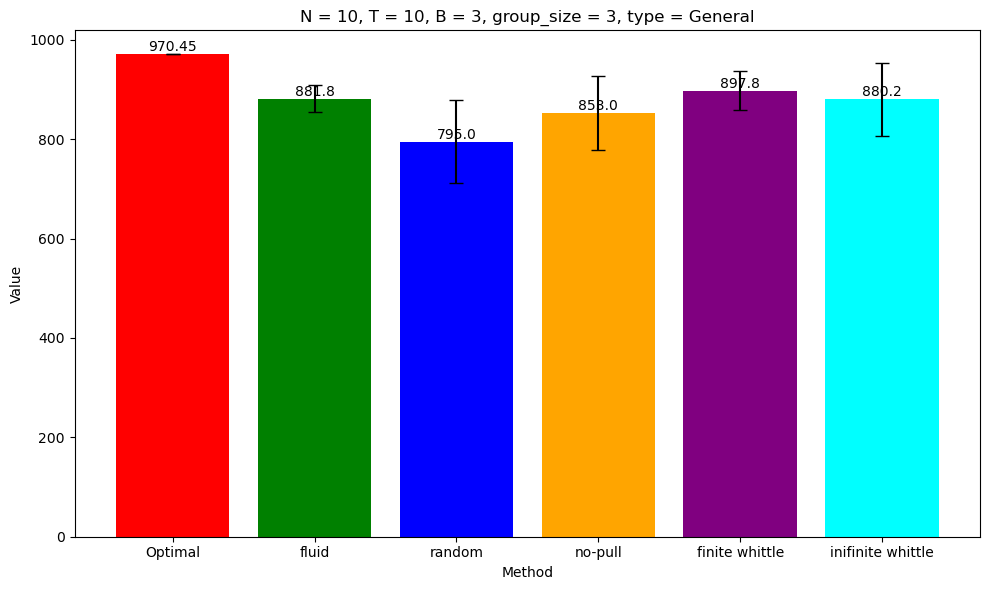

In [4]:
S = 10
N = 10
group_member_num = 3
K = 3
S_prime = S * 2
A = 2
T = 10
num_simulations = 5
comparison(S, N, group_member_num, K, S_prime, A, T, num_simulations, 'General')